convergio en 4 epocas
pesos: [0.2 0.1]  bias: -0.2
predicciones: [0, 0, 0, 1]
esperado:     [0, 0, 0, 1]


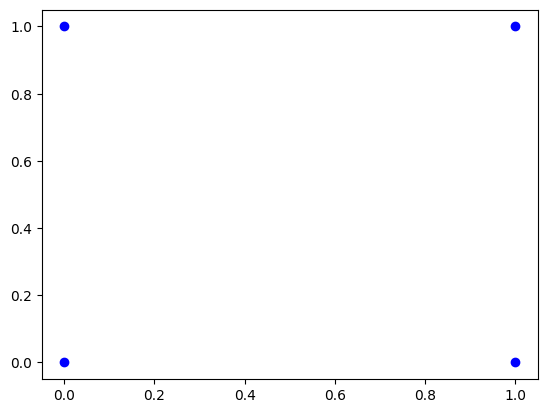

In [9]:
# PERCEPTRON

import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self,lr = 0.1, epocas = 1000):
        self.lr = lr
        self.epocas = epocas
        self.W = None
        self.b = None
    #-----------------------------------
    def activacion(self,z):
        if z>0:
            return 1
        else:
            return 0
    #-----------------------------------
    def predecir_(self,x):
        z = 0
        for i in range(len(x)):
            z+=(self.W[i]*x[i])
        z+=self.b
        return self.activacion(z)    # → 0 o 1
    #------------------------------
    def entrenar(self,X,y):
        m, n = X.shape
        self.W = np.zeros(n)
        self.b = 0
        for i in range(self.epocas):
            errs = 0
            for i in range(len(X)):
                pred = self.predecir_(X[i])
                err = y[i] - pred
                self.W = self.W + self.lr*err*X[i]
                self.b = self.b + self.lr*err
                if err != 0:
                    errs +=1
            if errs == 0:
                print(f"convergio en {i + 1} epocas")
                break
    #---------------------------------
    def predecir(self,X):          # array (n, features)
        predicciones = []
        for i in range(len(X)):
            predicciones.append(self.predecir_(X[i]))
        return predicciones
    #-------------------------------------------

if __name__=='__main__':
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]
    ])
    y = np.array([0,0,0,1])
    perceptron = Perceptron(lr=0.1,epocas=1000)
    perceptron.entrenar(X,y)
    y_pred = perceptron.predecir(X)
    print(f"pesos: {perceptron.W}  bias: {perceptron.b}")
    print(f"predicciones: {y_pred}")
    print(f"esperado:     {y.tolist()}")
    plt.scatter(X[:,0],X[:,1],color = 'blue')
    

epoch 0  error: 0.252473
epoch 1000  error: 0.247549
epoch 2000  error: 0.011277
epoch 3000  error: 0.002283
epoch 4000  error: 0.001181
epoch 5000  error: 0.000781
epoch 6000  error: 0.000577
epoch 7000  error: 0.000456
epoch 8000  error: 0.000375
epoch 9000  error: 0.000318


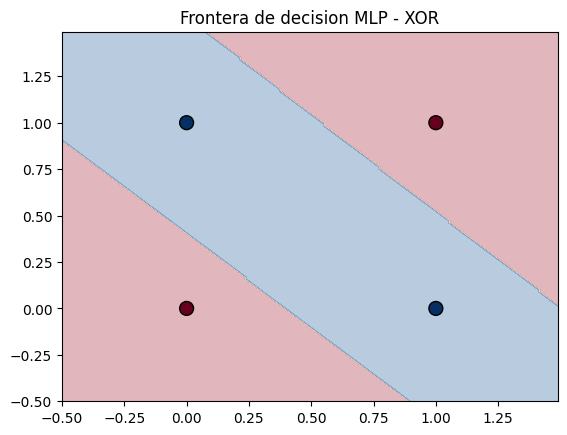


predicciones: [0, 1, 1, 0]
esperado:     [0, 1, 1, 0]


In [12]:
import numpy as np

class MLP:
    def __init__(self, n_entrada, n_oculta, n_salida, lr=0.1, epochs=10000):
        self.lr      = lr
        self.epochs  = epochs
        self.W1 = np.random.randn(n_entrada, n_oculta) * 0.5  # (n_entrada, n_oculta)
        self.b1 = np.zeros((1, n_oculta))                      # (1, n_oculta)
        self.W2 = np.random.randn(n_oculta, n_salida)  * 0.5  # (n_oculta, n_salida)
        self.b2 = np.zeros((1, n_salida))                      # (1, n_salida)
    #----------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))                            # 1/(1+e^-z)
    #----------------------------------
    def sigmoid_derivada(self, a):
        return a * (1 - a)                                     # a ya es sigmoid(z)
    #----------------------------------
    def forward(self, X):
        self.z1 = X   @ self.W1 + self.b1                     # (n, n_oculta)
        self.a1 = self.sigmoid(self.z1)                        # (n, n_oculta)
        self.z2 = self.a1 @ self.W2 + self.b2                 # (n, n_salida)
        self.a2 = self.sigmoid(self.z2)                        # (n, n_salida)
        return self.a2
    #----------------------------------
    def backward(self, X, y):
        error_salida = y - self.a2                                     # (n, n_salida)
        delta2       = error_salida * self.sigmoid_derivada(self.a2)   # (n, n_salida)
        error_oculta = delta2 @ self.W2.T                              # (n, n_oculta)
        delta1       = error_oculta * self.sigmoid_derivada(self.a1)   # (n, n_oculta)
        self.W2 += self.lr * self.a1.T @ delta2                       # (n_oculta, n_salida)
        self.b2 += self.lr * delta2.sum(axis=0, keepdims=True)        # (1, n_salida)
        self.W1 += self.lr * X.T @ delta1                             # (n_entrada, n_oculta)
        self.b1 += self.lr * delta1.sum(axis=0, keepdims=True)        # (1, n_oculta)
    #----------------------------------
    def entrenar(self, X, y):
        for epoch in range(self.epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 1000 == 0:
                error = np.mean((y - self.a2)**2)              # MSE
                print(f"epoch {epoch}  error: {error:.6f}")
    #----------------------------------
    def predecir(self, X):
        a2           = self.forward(X)                         # (n, 1)
        predicciones = []
        for i in range(len(a2)):
            if a2[i][0] >= 0.5:
                predicciones.append(1)
            else:
                predicciones.append(0)
        return predicciones                                    # [0,1,1,0]
    #------------------------------------
    def graficar(self, X, y):
        x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5        # -0.5, 1.5
        y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5        # -0.5, 1.5
        xx, yy       = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))     # grilla 200x200
        malla = np.c_[xx.ravel(), yy.ravel()]                          # (40000, 2)
        Z     = np.array(self.predecir(malla))                         # (40000,)
        Z     = Z.reshape(xx.shape)                                    # (200, 200)
        plt.figure()
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
        plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='RdBu', edgecolors='black', s=100)
        plt.title("Frontera de decision MLP - XOR")
        plt.show()
    
#======================================
if __name__ == '__main__':
    X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
    y = np.array([[0],[1],[1],[0]],         dtype=float)

    mlp = MLP(n_entrada=2, n_oculta=4, n_salida=1, lr=0.5, epochs=10000)
    mlp.entrenar(X, y)
    y_pred = mlp.predecir(X)
    mlp.graficar(X,y)
    print(f"\npredicciones: {y_pred}")
    print(f"esperado:     {y.flatten().astype(int).tolist()}")